DATASET = https://www.kaggle.com/drgfreeman/rockpaperscissors

In [1]:
!pwd
%cd drive/My Drive/Colab Notebooks

/content
/content/drive/My Drive/Colab Notebooks


In [2]:
import os
os.listdir('rockpaperscissors')

['README_rpc-cv-images.txt',
 'rps-cv-images',
 'scissors',
 'rock',
 'paper',
 'Validation',
 'Train']

#***SPLIT DATA VALIDATION***

Split Data Untuk Validation 40% (GAMBAR SCISSORS)

In [ ]:
import shutil
from random import choice
rootdir = 'rockpaperscissors/scissors'
output_dir = 'rockpaperscissors/Validation/Scissors'
for subdir, dir, files in os.walk(rootdir):
    if files:
        for x in range(int(len(files) *.40)):
            to_copy = choice(files)
            shutil.copy(os.path.join(subdir, to_copy), os.path.join(output_dir, to_copy))
            files.remove(to_copy)

In [ ]:

path = 'rockpaperscissors/Validation/Scissors'
files = os.listdir(path)
len(files)

300

Split Data Untuk Validation 40% (GAMBAR PAPER)

In [ ]:

rootdir = 'rockpaperscissors/paper'
output_dir = 'rockpaperscissors/Validation/Paper'
for subdir, dir, files in os.walk(rootdir):
    if files:
        for x in range(int(len(files) *.40)):
            to_copy = choice(files)
            shutil.copy(os.path.join(subdir, to_copy), os.path.join(output_dir, to_copy))
            files.remove(to_copy)

In [ ]:
path = 'rockpaperscissors/Validation/Paper'
files = os.listdir(path)
len(files)

284

Split Data Untuk Validation 40% (GAMBAR ROCK)

In [ ]:

rootdir = 'rockpaperscissors/rock'
output_dir = 'rockpaperscissors/Validation/Rock'
for subdir, dir, files in os.walk(rootdir):
    if files:
        for x in range(int(len(files) *.40)):
            to_copy = choice(files)
            shutil.copy(os.path.join(subdir, to_copy), os.path.join(output_dir, to_copy))
            files.remove(to_copy)

In [ ]:
path = 'rockpaperscissors/Validation/Rock'
files = os.listdir(path)
len(files)

290

#***SPLIT DATA TRAIN***

Split Data Untuk Train 60% (GAMBAR SCISSORS)

In [ ]:

rootdir = 'rockpaperscissors/scissors'
output_dir = 'rockpaperscissors/Train/Scissors'
for subdir, dir, files in os.walk(rootdir):
    if files:
        for x in range(int(len(files) *.60)):
            to_copy = choice(files)
            shutil.copy(os.path.join(subdir, to_copy), os.path.join(output_dir, to_copy))
            files.remove(to_copy)

In [ ]:
path = 'rockpaperscissors/Train/Scissors'
files = os.listdir(path)
len(files)

450

Split Data Untuk Train 60% (GAMBAR PAPER)

In [ ]:

rootdir = 'rockpaperscissors/paper'
output_dir = 'rockpaperscissors/Train/Paper'
for subdir, dir, files in os.walk(rootdir):
    if files:
        for x in range(int(len(files) *.60)):
            to_copy = choice(files)
            shutil.copy(os.path.join(subdir, to_copy), os.path.join(output_dir, to_copy))
            files.remove(to_copy)

In [ ]:
path = 'rockpaperscissors/Train/Paper'
files = os.listdir(path)
len(files)

427

Split Data Untuk Train 60% (GAMBAR ROCK)

In [ ]:
rootdir = 'rockpaperscissors/rock'
output_dir = 'rockpaperscissors/Train/Rock'
for subdir, dir, files in os.walk(rootdir):
    if files:
        for x in range(int(len(files) *.60)):
            to_copy = choice(files)
            shutil.copy(os.path.join(subdir, to_copy), os.path.join(output_dir, to_copy))
            files.remove(to_copy)

In [ ]:
path = 'rockpaperscissors/Train/Rock'
files = os.listdir(path)
len(files)

435

#***PROCESS***

In [3]:
os.listdir('rockpaperscissors/Train')

['Rock', 'Paper', 'Scissors']

In [4]:
os.listdir('rockpaperscissors/Validation')

['Paper', 'Rock', 'Scissors']

In [5]:
TRAIN_DATA_PATH = 'rockpaperscissors/Train/'
VALIDATION_DATA_PATH = 'rockpaperscissors/Validation/'

**Image data generator** adalah sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing yang akan diberikan ke model. Beberapa kemudahan yang disediakan Image data generator adalah, preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.

Augmentasi gambar adalah teknik untuk menciptakan data-data baru dari data yang telah ada. Contoh augmentasi gambar adalah **horizontal flip** di mana gambar akan dibalikkan secara horizontal.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode ='nearest',
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode ='nearest',
    zoom_range=0.2
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_PATH,
    target_size=(100, 100),
    batch_size=8,
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    VALIDATION_DATA_PATH,
    target_size=(100, 100),
    batch_size=8,
    class_mode='binary')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


CNN pada keras mirip dengan MLP perbedaannya hanya pada terdapatnya 2 lapis layer konvolusi dan max pooling. Fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar. Sedangkan layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan MLP lebih cepat.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax') #pakai softmax karena class lebih dari 2
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

Setelah membuat arsitektur dari CNN, diharuskan memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer.

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [11]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,# tambahkan eposchs jika akurasi model belum optimal
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1)

Epoch 1/20
25/25 [==============================] - 157s 6s/step - loss: 1.1709 - accuracy: 0.2950 - val_loss: 1.0967 - val_accuracy: 0.4500
Epoch 2/20
25/25 [==============================] - 132s 5s/step - loss: 1.0981 - accuracy: 0.3150 - val_loss: 1.1001 - val_accuracy: 0.3500
Epoch 3/20
25/25 [==============================] - 120s 5s/step - loss: 1.0973 - accuracy: 0.3800 - val_loss: 1.0940 - val_accuracy: 0.3750
Epoch 4/20
25/25 [==============================] - 98s 4s/step - loss: 1.0988 - accuracy: 0.3700 - val_loss: 1.0930 - val_accuracy: 0.5000
Epoch 5/20
25/25 [==============================] - 86s 3s/step - loss: 1.0777 - accuracy: 0.4050 - val_loss: 1.1448 - val_accuracy: 0.3000
Epoch 6/20
25/25 [==============================] - 81s 3s/step - loss: 1.0418 - accuracy: 0.4550 - val_loss: 0.9125 - val_accuracy: 0.6750
Epoch 7/20
25/25 [==============================] - 70s 3s/step - loss: 0.8798 - accuracy: 0.5900 - val_loss: 0.7203 - val_accuracy: 0.7000
Epoch 8/20
25/25 

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
Scissor


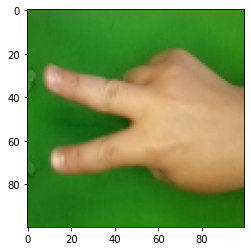

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  classes = np.argmax(array)

  print(fn)
  if classes== 0:
    print('Paper')
  elif classes==1:
    print('Rock')
  else:
    print('Scissor')